# Deep Learning QA Bot

## Loading the data

We will be working with the Babi Data Set from Facebook Research.

Full Details: https://research.fb.com/downloads/babi/

- Jason Weston, Antoine Bordes, Sumit Chopra, Tomas Mikolov, Alexander M. Rush,
  "Towards AI-Complete Question Answering: A Set of Prerequisite Toy Tasks",
  http://arxiv.org/abs/1502.05698

- End-to-End Memory Networks, https://arxiv.org/pdf/1503.08895.pdf

## Goal of this Project

+ To implement as chat bot that can answer questions basded on a "story" given to the bot

# There will be three components to this project

### Example

+ Story: Jane went to the store. Mike ran to the bedroom.

+ Question: Is Mike in the store?

+ Goal - Bot to answer: No



# How the QA Bot Network Works

+ Model takes a discrete set of inputs that are to be stored in the memory
+ It will take a corresponding question and output an answer
+ Each of the inputs, questions and answers contain symbols coming from a dictionary with vocabulary words
+ Model then write all of the text to the memory up to a fixed buffer size, and then finds a continuous representation for the text and question

In [1]:
# importing libraries

import pickle
import numpy as np

In [2]:
# unpickling train text data and storing it into a variable

with open("train_qa.txt", "rb") as fp:    # Unpickling
    train_data = pickle.load(fp)

In [3]:
# unpickling test text data and storing it into a variable

with open("test_qa.txt", "rb") as fp:    # Unpickling
    test_data = pickle.load(fp)

## Exploring the Format of the Data

In [4]:
# using the type function to understand the type of object the test data is

type(test_data)

list

In [5]:
# using the type function to understand the type of object the training data is

type(train_data)

list

In [6]:
# now looking at the length of the test data

len(test_data)

1000

In [7]:
# now looking at the length of the train data

len(train_data)

10000

In [8]:
# taking a look at the first tuple in the training data

train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [9]:
# concatenating the first tuple into a sentence

' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [10]:
# concatenating the question in the first tuple

' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [11]:
# printing out the answer in the first tuple

train_data[0][2]

'no'

In [12]:
# create a set that holds the vocab words
# stores unique values

vocab = set()

In [13]:
# creating a new variable that contrains both datasets and is a big list

all_data = test_data + train_data

In [14]:
# creating a for loop to add all distinct words for the story, the question and the answer

for story, question , answer in all_data:
    vocab = vocab.union(set(story)) # union will look for all distinct values between the two sets / continuously adding new distinct words while keeping current list in consideration
    vocab = vocab.union(set(question))  

In [15]:
# adding yes and no to the vocabulary

vocab.add('no')
vocab.add('yes')

In [16]:
# looking at the set of all possible vocab words

vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [17]:
# need to add a plus one when capturing the length
# since we need use keras for padding the sequences, adding a 0 is a placeholder for

vocab_len = len(vocab) + 1

## Further Exploration will be needed here

### Why?

+ How long in terms of characters is the longest story?
+ How long is the longest question?
+ The way to find this information out is by creating a variable that loops through all of the stories / questions and return the one with the highest character count 

In [18]:
# start with story, writing a for loop that will return the highest number of characters in a story

max_story_len = max([len(data[0]) for data in all_data])

In [19]:
# printing out the number for max story length

max_story_len

156

In [20]:
# start with story, writing a for loop that will return the highest number of characters in a question?

max_question_len = max([len(data[1]) for data in all_data])

In [21]:
# printing out the number for max question length

max_question_len

6

In [23]:
# vocab

In [24]:
# Reserve 0 for pad_sequences

vocab_size = len(vocab) + 1

In [25]:
# importing libraries

from keras.preprocessing.sequence import pad_sequences  # padding sequences
from keras.preprocessing.text import Tokenizer

In [26]:
# integer encode sequences of words

tokenizer = Tokenizer(filters=[]) # it is an empty list because we do not want any filters
tokenizer.fit_on_texts(vocab) # fitting the tokenizer to the vocabulary

In [27]:
# word_index is a dictionary that maps every word to a specific index number

tokenizer.word_index

{'journeyed': 1,
 'sandra': 2,
 'in': 3,
 'grabbed': 4,
 'to': 5,
 'back': 6,
 'no': 7,
 'went': 8,
 'office': 9,
 'picked': 10,
 'moved': 11,
 'football': 12,
 'hallway': 13,
 'bathroom': 14,
 'left': 15,
 'up': 16,
 'is': 17,
 'apple': 18,
 'down': 19,
 'dropped': 20,
 'there': 21,
 'put': 22,
 'got': 23,
 'mary': 24,
 'discarded': 25,
 'yes': 26,
 '.': 27,
 'travelled': 28,
 'the': 29,
 '?': 30,
 'garden': 31,
 'john': 32,
 'bedroom': 33,
 'milk': 34,
 'daniel': 35,
 'took': 36,
 'kitchen': 37}

In [28]:
# creating three empty lists. one for the story, question and answers

train_story_text = []
train_question_text = []
train_answers = []

# writing a for loop that appends the story, and question into the empty lists

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [30]:
# example to look at will be train_story_text to see just the stories

# train_story_text

In [31]:
# passing in the list of stories to convert to sequences
# essentially it is changing the word to its word index, or numerical representation

train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [32]:
# total length of stories

len(train_story_text)

10000

In [33]:
# total length of sequences 
# it needs and should be the same as above

len(train_story_seq)

10000

In [35]:
# word_index = tokenizer.word_index

In [36]:
# writing a function that can vectorize the stories

def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
    
    
    # X = stories
    X = []
    # Xq = question
    Xq = []
    # Y = correct answer
    Y = []
    
    
    for story, query, answer in data:
        
        # grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        
        # grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        
        # grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # index 0 is reserved so we're going to use + 1
        
        y = np.zeros(len(word_index) + 1)
        
        # now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        
        y[word_index[answer]] = 1
        
        # append each set of story,query, and answer to their respective holding lists
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # return tuple for unpacking
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [37]:
# getting the story, question and answers from the training data to be vectorized using the vectorize stories 

inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [38]:
# getting the story, question and answers from the test data to be vectorized using the vectorize stories 

inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [39]:
# looking at the variable and understanding that the stories are now an array of numbers after being vectorized

inputs_test

array([[ 0,  0,  0, ..., 29, 33, 27],
       [ 0,  0,  0, ..., 29, 31, 27],
       [ 0,  0,  0, ..., 29, 31, 27],
       ...,
       [ 0,  0,  0, ..., 29, 18, 27],
       [ 0,  0,  0, ..., 29, 31, 27],
       [ 0,  0,  0, ..., 18, 21, 27]])

In [40]:
# looking at the variable and understanding that the questions are now an array of numbers after being vectorized

queries_test

array([[17, 32,  3, 29, 37, 30],
       [17, 32,  3, 29, 37, 30],
       [17, 32,  3, 29, 31, 30],
       ...,
       [17, 24,  3, 29, 33, 30],
       [17,  2,  3, 29, 31, 30],
       [17, 24,  3, 29, 31, 30]])

In [41]:
# looking at the variable and understanding that the answers are now an array of numbers after being vectorized

answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
# adding total answers in test data

sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [43]:
# looking at the word index for yes in the array above and it behind no
# by the positioning of 497, there are 497 questions that have the answer yes

tokenizer.word_index['yes']

26

In [44]:
# looking at the word index for no
# there 503 questions that have the answer no

tokenizer.word_index['no']

7

# Creating the Model

## Build the Neural Network

+ Input Encoder M
+ Input Encoder C
+ Question Encoder

### Complete the Network

In [45]:
# importing keras models and layers for neural network

from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

### Placeholders for Inputs

Recall we technically have two inputs, stories and questions. So we need to use placeholders. `Input()` is used to instantiate a Keras tensor.

In [46]:
# placeholder shape = (max_story_len, batch_size)

input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [47]:
vocab_size = len(vocab) + 1

### Building the Networks

To understand why we chose this setup, make sure to read the paper we are using:

* Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, Rob Fergus,
  "End-To-End Memory Networks",
  http://arxiv.org/abs/1503.08895

## Encoders

### Input Encoder m

In [48]:
# Input gets embedded to a sequence of vectors

input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# This encoder will output:
# (samples, story_maxlen, embedding_dim)

### Input Encoder c

In [49]:
# embed the input into a sequence of vectors of size query_maxlen

input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

# output: (samples, story_maxlen, query_maxlen)

## Question Encoder

In [50]:
# embed the question into a sequence of vectors

question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))

# output: (samples, query_maxlen, embedding_dim)

## Encode the Sequences

In [51]:
# encode input sequence and questions (which are indices)
# to sequences of dense vectors

input_encoded_m = input_encoder_m(input_sequence) # result of passing through the encoder
input_encoded_c = input_encoder_c(input_sequence) # result of passing through the encoder
question_encoded = question_encoder(question)

##### Use dot product to compute the match between first input vector seq and the query

In [52]:
# shape: `(samples, story_maxlen, query_maxlen)`
# just like in the paper, using softmax for activation

match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

#### Add this match matrix with the second input vector sequence

In [53]:
# add the match matrix with the second input vector sequence

response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)  # (samples, query_maxlen, story_maxlen)

#### Concatenate

In [54]:
# concatenate the match matrix with the question vector sequence

answer = concatenate([response, question_encoded])

In [55]:
# tensorflow tensor

answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [56]:
# reduce with RNN (LSTM)

answer = LSTM(32)(answer)  # (samples, 32)

In [57]:
# regularization with dropout

answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)  # (samples, vocab_size) then pass in our answer

In [58]:
# we output a probability distribution over the vocabulary

answer = Activation('softmax')(answer)

# build the final model
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
# as it is demonstrated in the paper, the model is a bit complex

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

## Fit/Train the Network

+ Plot out Training History
+ Evaluate on Test Set
+ Create our own stories and question to test the bot

In [60]:
# training the model
# train on 10000 samples, validate on 1000 samples

history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=200,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/200
313/313 [==============================] - 4s 7ms/step - loss: 0.9123 - accuracy: 0.4985 - val_loss: 0.6954 - val_accuracy: 0.5030
Epoch 2/200
313/313 [==============================] - 2s 6ms/step - loss: 0.7072 - accuracy: 0.5026 - val_loss: 0.6936 - val_accuracy: 0.5030
Epoch 3/200
313/313 [==============================] - 2s 6ms/step - loss: 0.6977 - accuracy: 0.5044 - val_loss: 0.6938 - val_accuracy: 0.4970
Epoch 4/200
313/313 [==============================] - 2s 6ms/step - loss: 0.6958 - accuracy: 0.4985 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 5/200
313/313 [==============================] - 2s 6ms/step - loss: 0.6949 - accuracy: 0.5001 - val_loss: 0.6938 - val_accuracy: 0.5030
Epoch 6/200
313/313 [==============================] - 2s 6ms/step - loss: 0.6946 - accuracy: 0.5009 - val_loss: 0.6934 - val_accuracy: 0.4610
Epoch 7/200
313/313 [==============================] - 2s 6ms/step - loss: 0.6937 - accuracy: 0.5079 - val_loss: 0.6944 - val_accuracy: 0.5050

In [61]:
### Saving the model

file = 'chatbot_200.h5'
model.save(file)

C:\Users\chaco\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


### Evaluating the Model

#### Plotting out Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


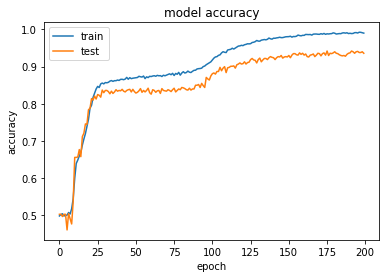

In [62]:
import matplotlib.pyplot as plt # importing matplotlib for data visualization
%matplotlib inline
print(history.history.keys())

# summarize history for accuracy

plt.plot(history.history['accuracy']) # plotting out history of accuracy
plt.plot(history.history['val_accuracy']) # plotting out history of validation accuracy
plt.title('model accuracy') # titling the graph
plt.ylabel('accuracy') # label for y
plt.xlabel('epoch') # label for x
plt.legend(['train', 'test'], loc='upper left') # adding the legend and locating it top left
plt.show()

### Evaluating on Given Test Set

In [63]:
# loading the model

model.load_weights(file)
pred_results = model.predict(([inputs_test, queries_test])) # list of two items. not passing the answers because we want predictions

In [64]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [65]:
# joining words to forumulate the story

story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [66]:
# joining words to forumulate the query

query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [67]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [68]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:    # if value is equal to the argmax search the word
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max]) # printing out how sure we are of the answer being no by accessing the probability in pred_results

Predicted answer is:  no
Probability of certainty was:  1.0


## Writing Own Stories and Questions

Remember you can only use words from the existing vocab

In [69]:
# Note the whitespace of the periods
# limited to the vocabulary it knows

my_story = "John left the kitchen . Sandra dropped the football in the garden ."   # creating a new story and storing it in a variable
my_story.split() # splitting the sentence

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [70]:
my_question = "Is the football in the garden ?"    # creating a new question and storing it in a variable

In [71]:
my_question.split()  # splitting the question

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [72]:
# passing the data into a new variable that formats it the same way as our training data

mydata = [(my_story.split(),my_question.split(),'yes')]

In [73]:
# vectorizing new story, question and answer

my_story,my_ques,my_ans = vectorize_stories(mydata) 

In [74]:
# calling on the model to predict an answer based on new story and question

pred_results = model.predict(([ my_story, my_ques]))

In [75]:
# generate prediction from model
# 

val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.99797946
